In [1]:
import torch
torch.set_grad_enabled(False)

from dataset import generate_dataset_disk
from module import *
from training import train, test

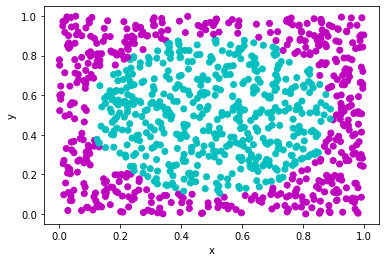

In [2]:
# Load the dataset
train_input, train_label = generate_dataset_disk()
test_input, test_label = generate_dataset_disk(plot=False)

In [3]:
model = Sequential(Linear(2, 25), ReLU(),
                    Linear(25,25), ReLU(),
                    Linear(25,25), ReLU(),
                    Linear(25,2), Sigmoid())
loss_function = MSE(model)
nb_epochs = 100
lr = 0.01

In [4]:
train(model, loss_function, train_input, train_label, nb_epochs, lr)

Epoch 10/100, Loss: 0.2280991820123724
Epoch 20/100, Loss: 0.09517364457732659
Epoch 30/100, Loss: 0.08190105526873448
Epoch 40/100, Loss: 0.07337917043804948
Epoch 50/100, Loss: 0.06566234376949143
Epoch 60/100, Loss: 0.057582930338591576
Epoch 70/100, Loss: 0.05886635960554102
Epoch 80/100, Loss: 0.047462639114469435
Epoch 90/100, Loss: 0.047896544253359395
Epoch 100/100, Loss: 0.04040557507289749


In [5]:
train_error = test(model, train_input, train_label)
test_error = test(model, test_input, test_label)

print('Train Error: {}%'.format(train_error))
print('Test Error: {}%'.format(test_error))

Train Error: 2.0%
Test Error: 3.0%
